In [19]:
# Dependencies
import json
import numpy as np
import pandas as pd
import tweepy
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() 

In [20]:
# Setup Tweeter API keys
consumer_key="tmmPIy6ikp19choEAZfk7TPgh"
consumer_secret="1eHgvKw8qJxwbnsUTkrkbgbEmeIKFSBB965tsV22ExNQs0DrPX"
access_token="807784981-y1hni3QPMfpm2o8U8Mk2NcallztB77iSP7sAHw38"
access_token_secret="2fyiDjEBZ9DFBAQin9ADa5eZ7QUCNtX4gJ1UJ8hN4Vvja"


In [21]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser()) 

In [23]:
# Search for People Tweeting about Donald Trump and trade
search_term = "Donald Trump trade"


# List of Eligible Tweets
tweet_list = []

# Retrieve 2000 tweets
public_tweets = api.search(search_term, count=2000)

# Print Tweets
for tweet in public_tweets["statuses"]:

    

        # If so add the user's tweet to the list (for future use)
        tweet_list.append(tweet["text"])

        # Print the username
        print(tweet["user"]["screen_name"])

        # Print the tweet text
        print(tweet["text"])
        print()

realDonaldVoter
🇺🇸 (President Donald Trump) : RT StateDept: .POTUS Trump thanks Prime Minister AbeShinzo for his support, discusses… https://t.co/60SFWoifLb

Flowerpowerbike
Donald Trump's double threat to global free trade https://t.co/mfCyzoCk55

ContitutionalDr
RT @TrumpsDC: President Donald Trump called out Japan today on their "very unfair" trade deficit with the United States in a joint press co…

TylerPo05502485
RT @TrumpsDC: President Donald Trump called out Japan today on their "very unfair" trade deficit with the United States in a joint press co…

mjbtimes
Donald Trump's double threat to global free trade https://t.co/0mAOL0dzcH : April 19, 2018 at 12:09AM via mikejulietbravo

klmayua
Donald Trump's double threat to global free trade https://t.co/yf4SKu5wkE Via BBC #Agribusiness #Investor #Nigeria

JustSeenThis
Donald Trump's double threat to global free trade https://t.co/vohqu8LmcO

talkvn
Trump issues public challenge to Abe on trade: US President Donald Trump issued a bl

In [24]:
# Print total number of eligible tweets
print(len(tweet_list)) 

100


In [25]:
# Target search term
search_term = "Donald Trump trade"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 2000 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(search_term, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 1

In [27]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head(10)

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Wed Apr 11 22:46:01 +0000 2018,0.000,1.000,0.000,1
1,0.0516,Tue Apr 10 02:40:15 +0000 2018,0.190,0.603,0.207,2
2,0.0000,Sun Sep 13 23:44:52 +0000 2015,0.000,1.000,0.000,3
3,0.0000,Fri Aug 14 21:50:02 +0000 2015,0.000,1.000,0.000,4
4,0.0000,Thu Apr 23 02:49:24 +0000 2015,0.000,1.000,0.000,5
5,0.0000,Thu Nov 13 15:49:32 +0000 2014,0.000,1.000,0.000,6
6,0.3400,Fri Oct 24 00:27:37 +0000 2014,0.000,0.833,0.167,7
7,0.0000,Tue Sep 16 04:15:12 +0000 2014,0.000,1.000,0.000,8
8,0.0000,Tue May 20 20:12:25 +0000 2014,0.000,1.000,0.000,9
9,-0.2960,Tue May 20 20:11:58 +0000 2014,0.167,0.833,0.000,10


In [29]:
# Save data to Excel
sentiments_pd.to_excel("DonaldTrumptrade.xlsx", encoding="latin-1") 

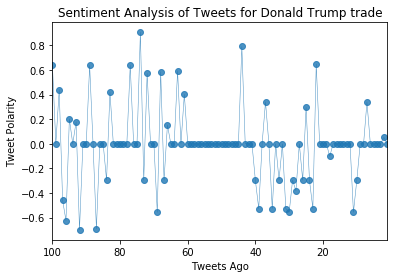

In [31]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
time.strftime("March2018")
plt.title(f"Sentiment Analysis of Tweets for {search_term}")
plt.xlim([x_vals.max(),x_vals.min()]) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show() 